In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
df = pd.read_excel("C:/Users/SAPTARSHI/Downloads/red_light_violation.xlsx")
df_cleaned = df.drop(columns=["Timestamp", "Name", "Email"], errors='ignore')
df_cleaned["RedLightViolation"] = df_cleaned["Have you ever crossed the street during a red light?"].map({"Yes": 1, "No": 0})
df_cleaned = df_cleaned.drop(columns=["Have you ever crossed the street during a red light?"], errors='ignore')

In [4]:
# Check available columns
print("Available columns:", df_cleaned.columns)

# Remove spaces and check again
df_cleaned.columns = df_cleaned.columns.str.strip()
print("Updated columns:", df_cleaned.columns)

# Define only existing columns
perception_cols = ["How do you react when you see someone running a red light?", "When do you believe red light violations are most common?", "Which type of vehicle is more likely to violate red light?", "Which type of intersections do you believe is most prone to red light violations?", "What type of public awareness campaign would be most likely to influence your driving behaviour regarding red light running?"]

existing_cols = [col for col in perception_cols  if col in df_cleaned.columns]
print(f"Using these perception columns: {existing_cols}")

Available columns: Index(['Age Group', 'Gender', 'Occupation',
       'Approximate monthly income of the person who violates traffic signals',
       'Education level', 'Driving Experience',
       'How often do your friends describe you as argumentative?',
       'Do you openly express disagreement with your friends?',
       'Do you find yourself getting into arguments when people disagree with you?',
       'Do you get into physical fights more frequently than the average person?',
       'Have you ever been so angry that you broke something?',
       'How do you react when you see someone running a red light?',
       'How many hours a day do you usually drive?',
       'In which areas do you think red light violations are more of a problem ?',
       'What are the main reasons that make you more likely to cross during a red light?',
       'Do you believe that adding countdown timers to traffic lights would reduce red light violations?',
       'What strategies or policies might m

In [5]:
# Proceed only with available columns
X = pd.get_dummies(df_cleaned[existing_cols], drop_first=True)
X = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(X), columns=X.columns)
y = df_cleaned["RedLightViolation"]

C:\Users\SAPTARSHI\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=500))])

In [8]:
# Extract feature importance (coefficients)
coefficients = pipeline.named_steps['model'].coef_[0]
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)


In [9]:
# Display the most influential parameter
print("\nMost Influential traffic external Factor:")
print(feature_importance.head(1))  # Top influencing factor


Most Influential traffic external Factor:
                                             Feature  Coefficient  \
2  How do you react when you see someone running ...    -1.227594   

   Abs_Coefficient  
2         1.227594  


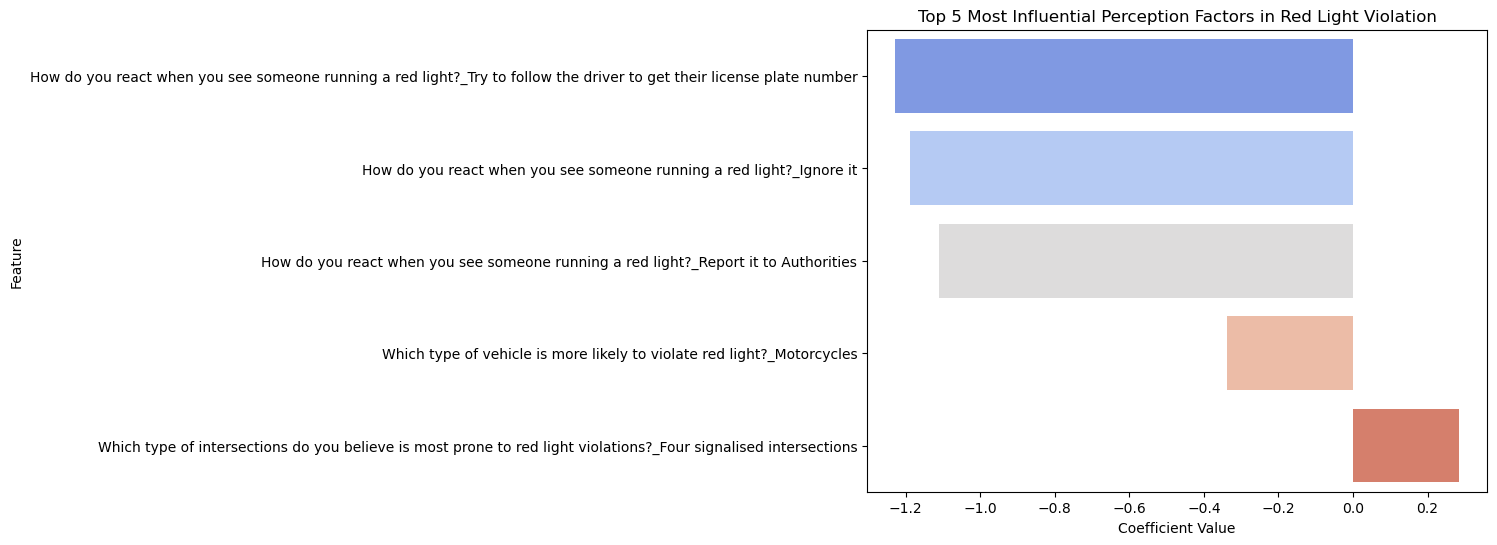

In [11]:
# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance.head(5), x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Top 5 Most Influential Perception Factors in Red Light Violation")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()